In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Aemf1.csv')

In [3]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
Person Capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
Multiple Rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
Business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000
Bedrooms,41714.0,1.165939,0.638157,0.000000,1.000000,1.000000,1.000000,10.000000
City Center (km),41714.0,2.679792,1.996684,0.015045,1.275913,2.253237,3.584489,25.284557
Metro Distance (km),41714.0,0.603921,0.706206,0.002301,0.236693,0.391220,0.678702,14.273577
Attraction Index,41714.0,293.905990,235.750055,15.152201,124.371614,228.920599,394.000201,4513.563486


In [6]:
df['Shared Room'] = df['Shared Room'].astype(int)
df['Private Room'] = df['Private Room'].astype(int)
df['Superhost'] = df['Superhost'].astype(int)

<AxesSubplot: >

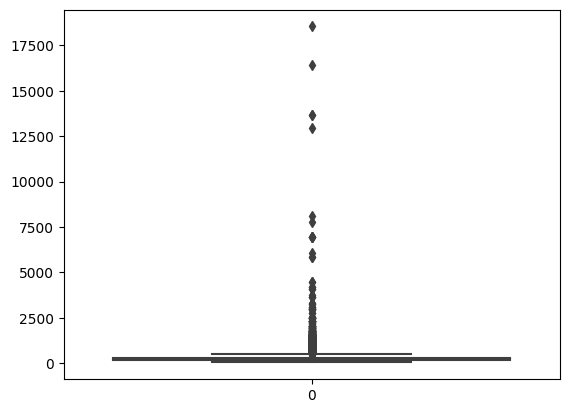

In [7]:
sns.boxplot(df['Price'])

In [8]:
col_outlier = ['Price', 'City Center (km)', 'Metro Distance (km)', 
               'Attraction Index', 'Normalised Attraction Index', 
               'Restraunt Index', 'Normalised Restraunt Index'] 

In [9]:
for col in col_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7
    
    df = df[(df[col] >= limit_low) & (df[col] <= limit_high)]

Text(0.5, 1.0, 'City Count')

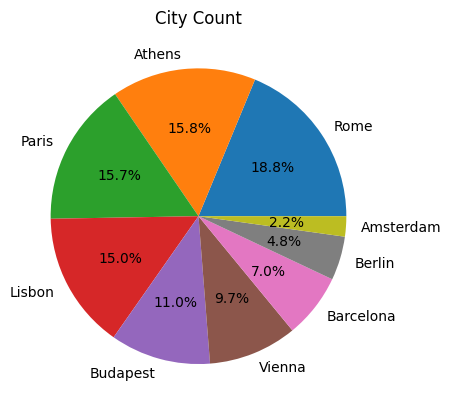

In [10]:
city_counts = df['City'].value_counts()
plt.pie(city_counts, labels = city_counts.index, autopct='%1.1f%%')
plt.title('City Count')

Text(0, 0.5, 'Count')

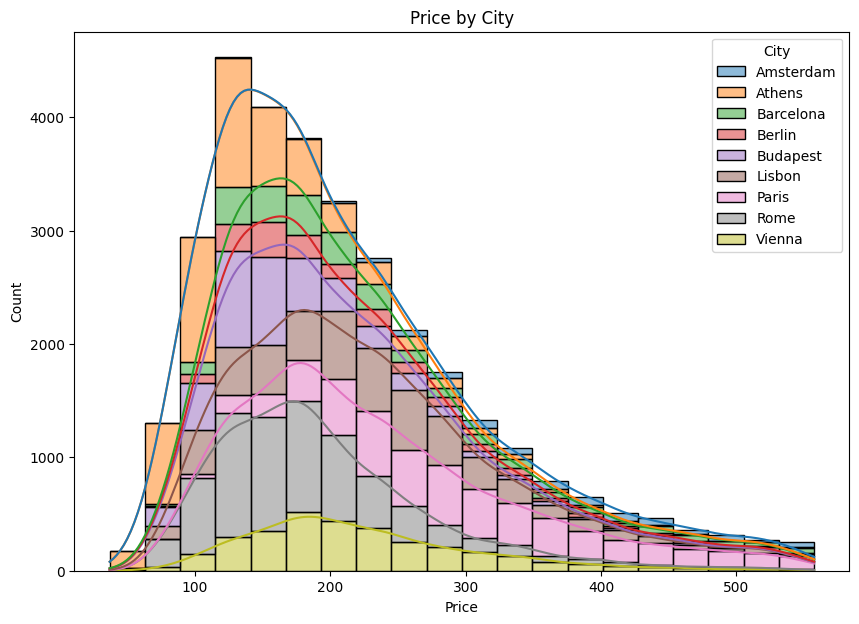

In [11]:
plt.figure(figsize = (10, 7))
sns.histplot(data = df, x = 'Price', hue = 'City', bins = 20, multiple = 'stack', kde = True)

plt.title('Price by City')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0.5, 0, 'Cleanliness Rating')

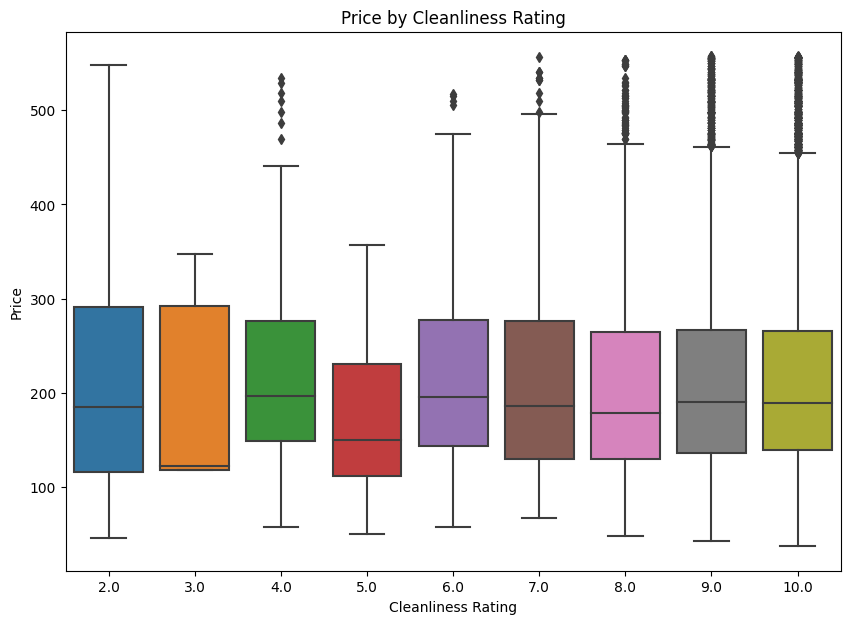

In [12]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Cleanliness Rating', y = 'Price', data=df)

plt.title('Price by Cleanliness Rating')
plt.ylabel('Price')
plt.xlabel('Cleanliness Rating')

Text(0.5, 0, 'Bedrooms')

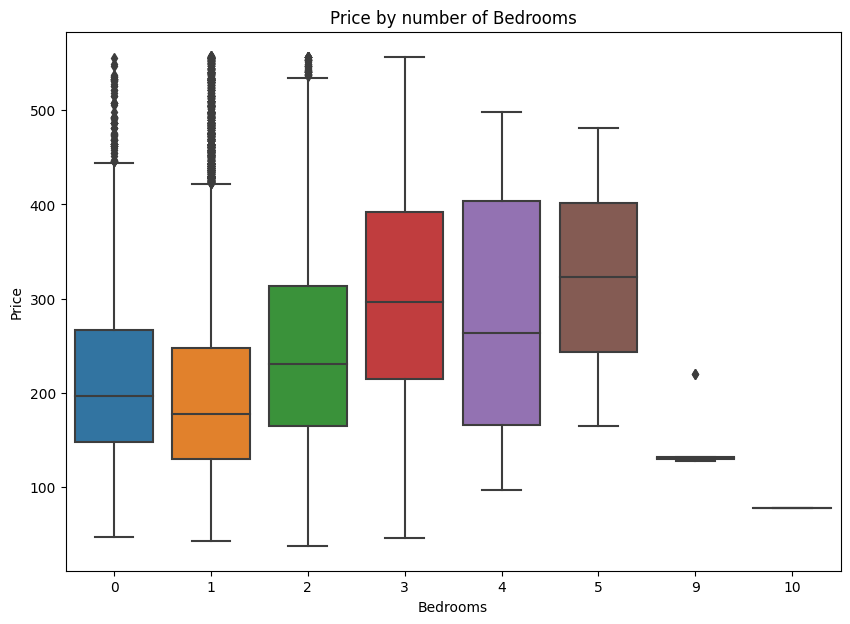

In [13]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Bedrooms', y = 'Price', data=df)

plt.title('Price by number of Bedrooms')
plt.ylabel('Price')
plt.xlabel('Bedrooms')

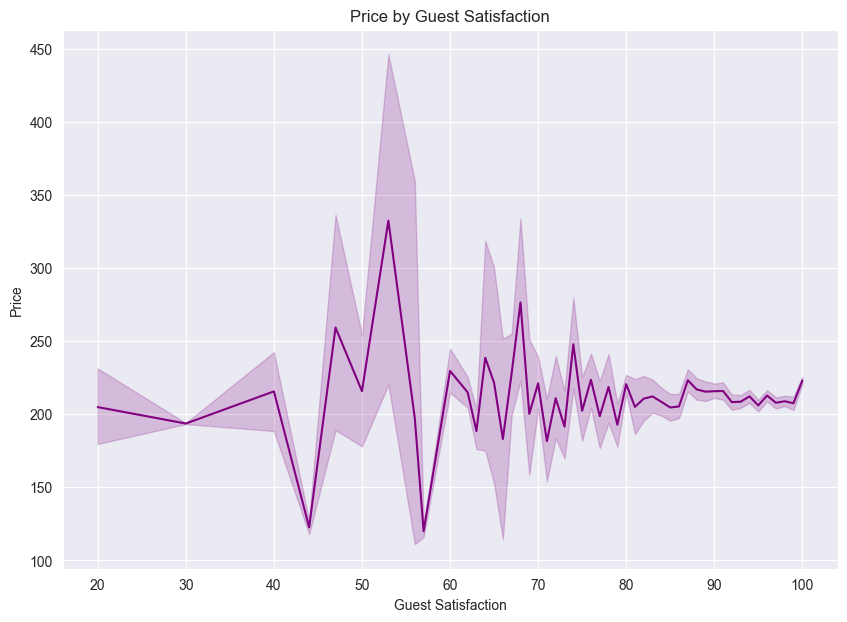

In [14]:
plt.figure(figsize = (10, 7))
sns.set_style('darkgrid')

sns.lineplot(x = 'Guest Satisfaction', y = 'Price', data = df, color = 'purple')

plt.title('Price by Guest Satisfaction')
plt.ylabel('Price')
plt.xlabel('Guest Satisfaction')

plt.show()

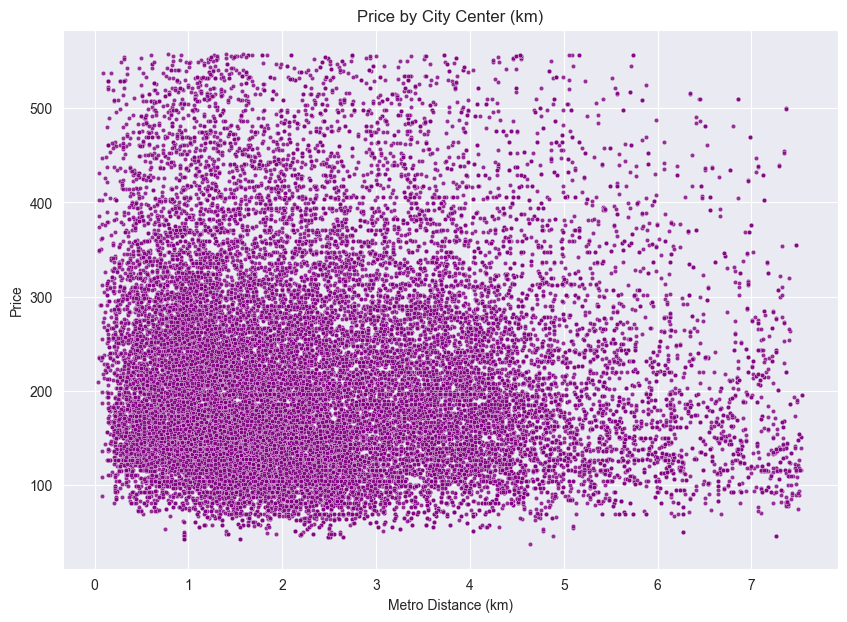

In [15]:
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')

sns.scatterplot(x = 'City Center (km)', y = 'Price', data = df, 
                color='purple', s = 10, alpha = 0.8)

plt.title('Price by City Center (km)')
plt.ylabel('Price')
plt.xlabel('Metro Distance (km)')

plt.show()

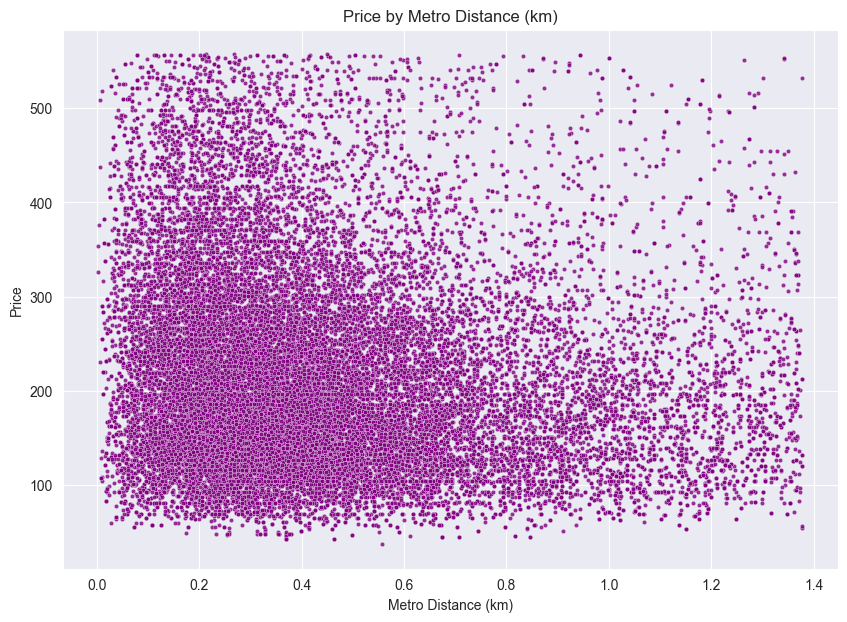

In [16]:
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')

sns.scatterplot(x = 'Metro Distance (km)', y = 'Price', 
                data = df, color='purple', s = 10, alpha = 0.8)

plt.title('Price by Metro Distance (km)')
plt.ylabel('Price')
plt.xlabel('Metro Distance (km)')

plt.show()

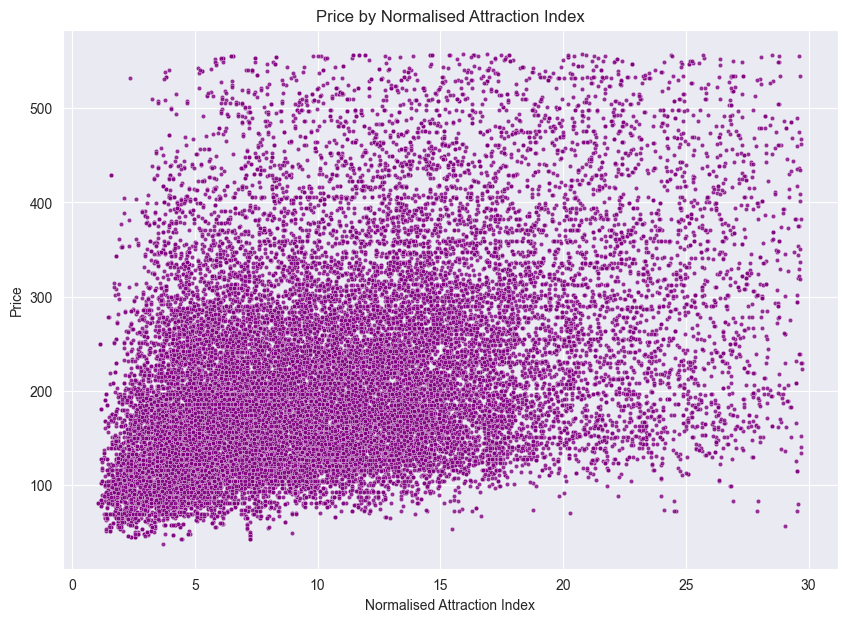

In [17]:
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')

sns.scatterplot(x = 'Normalised Attraction Index', y = 'Price', data = df, 
             color = 'purple', s = 10, alpha = 0.8)

plt.title('Price by Normalised Attraction Index')
plt.ylabel('Price')
plt.xlabel('Normalised Attraction Index')

plt.show()

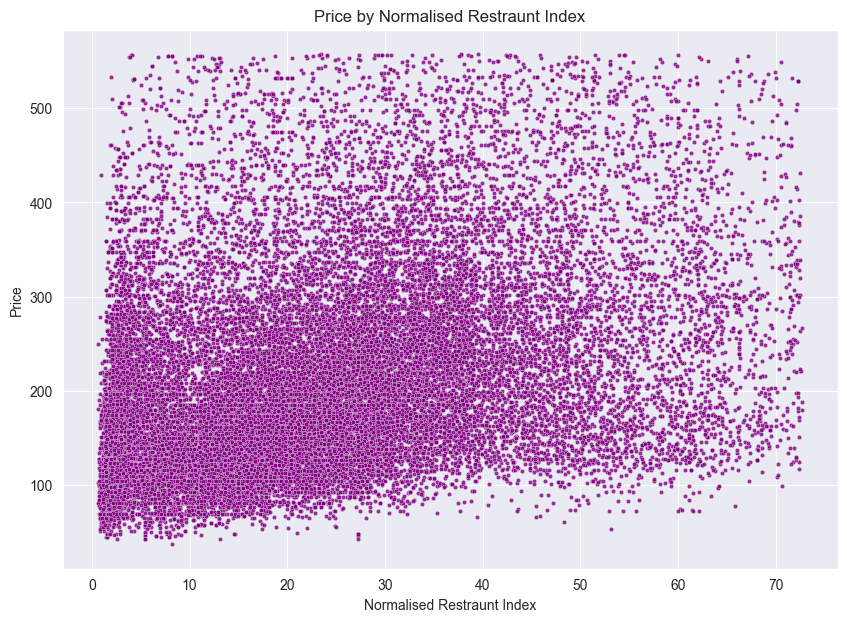

In [18]:
plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')

sns.scatterplot(x = 'Normalised Restraunt Index', y = 'Price', data = df, 
             color = 'purple', s = 10, alpha = 0.8)

plt.title('Price by Normalised Restraunt Index')
plt.ylabel('Price')
plt.xlabel('Normalised Restraunt Index')

plt.show()

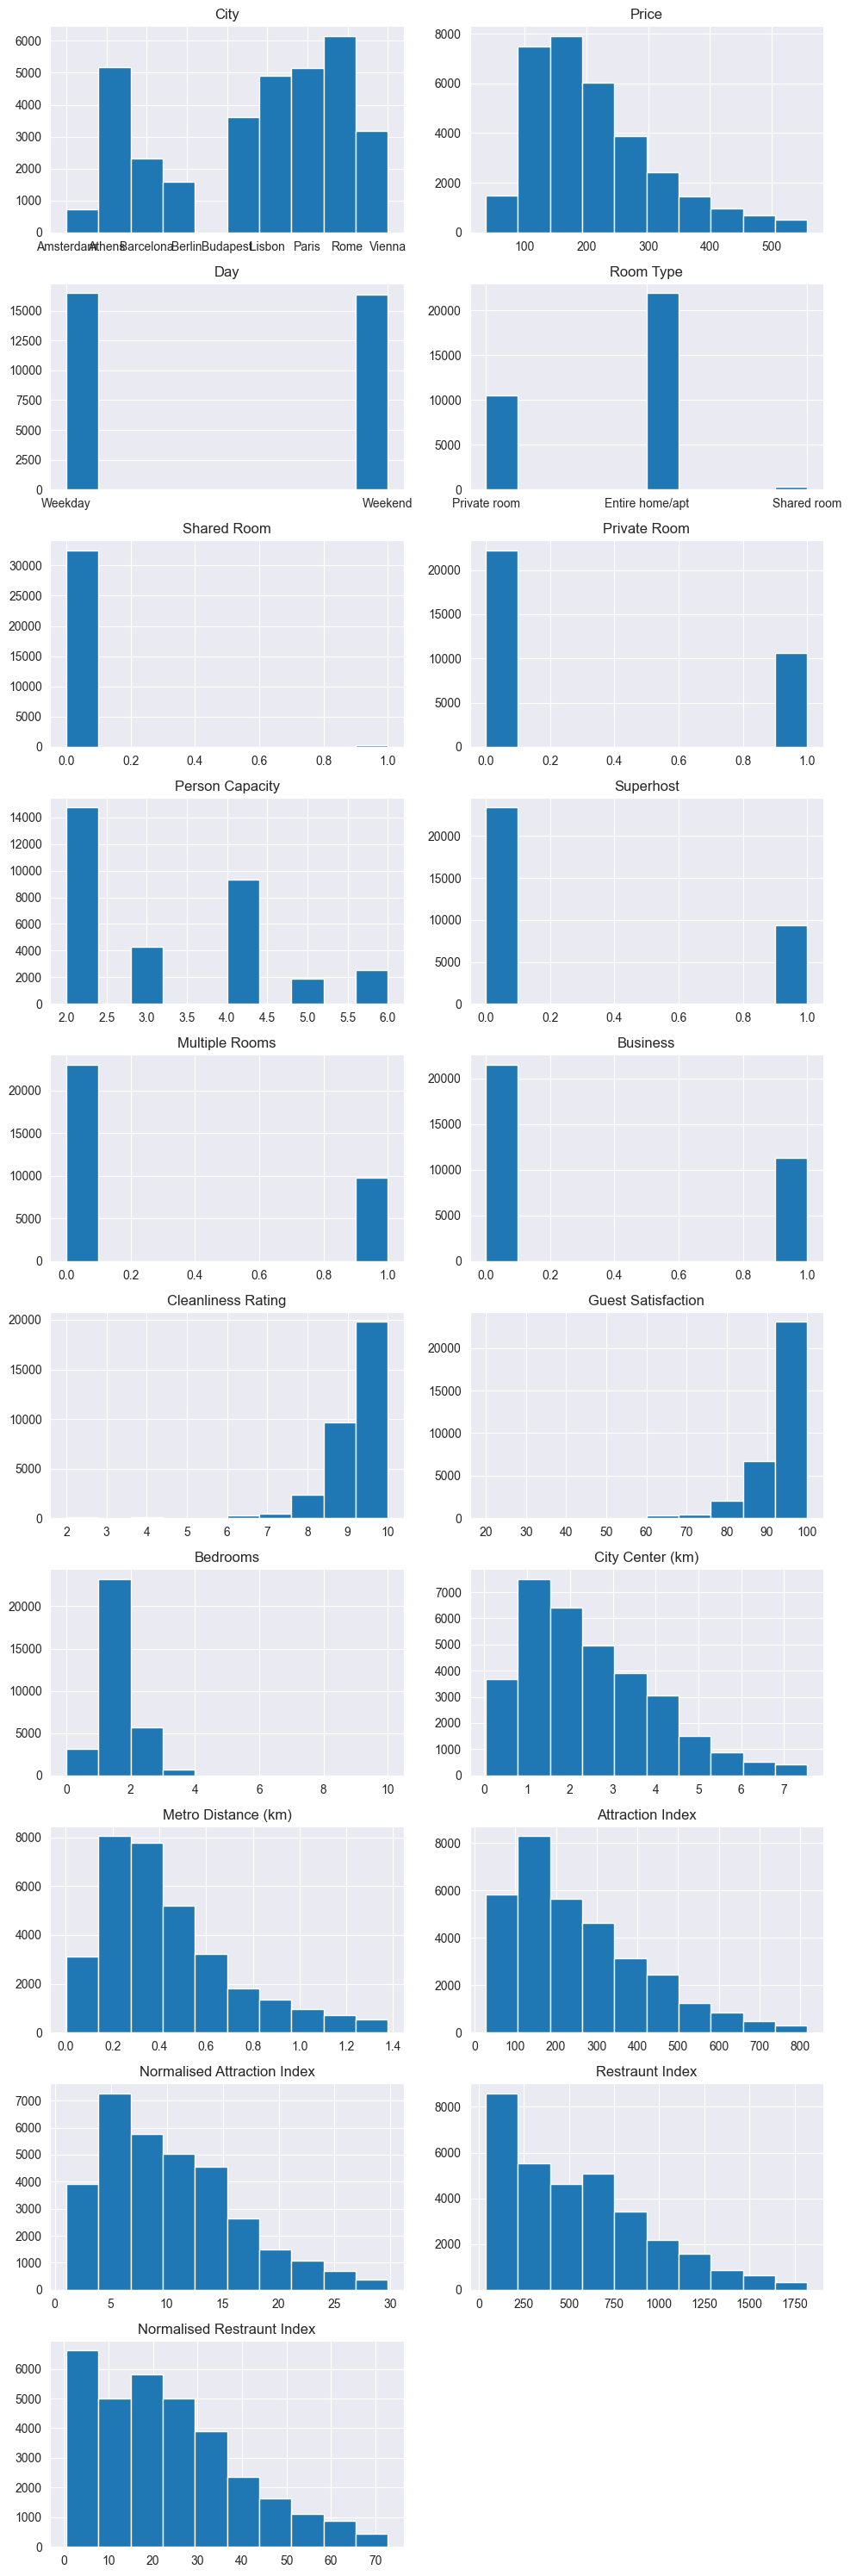

In [19]:
list_columns = list(df.columns)
plt.figure(figsize = (10, 30))
for i in range(len(list_columns)):
    plt.subplot(10, 2, i + 1)
    plt.title(list_columns[i])
    plt.hist(df[list_columns[i]])
plt.tight_layout()

C:\Users\pk989\AppData\Local\Temp\ipykernel_6252\3956689710.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot: >

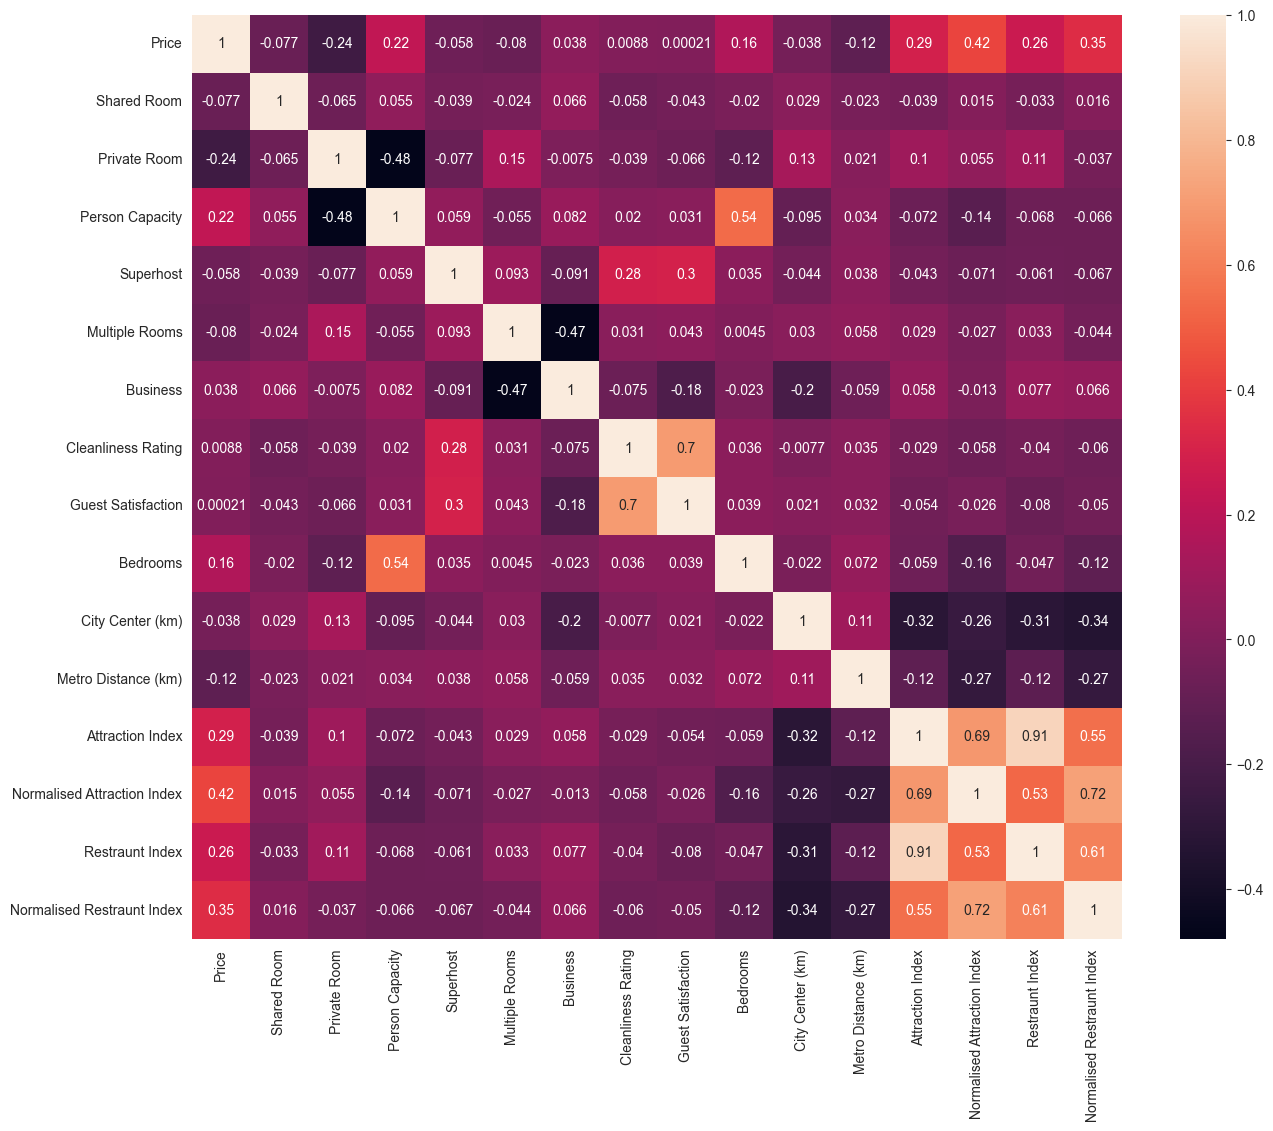

In [20]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.corr(), annot = True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [23]:
list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

In [24]:
X = df.drop(['Price','Shared Room','Private Room',
             'Superhost','Attraction Index','Restraunt Index', 'Day',
             'Cleanliness Rating'], axis = 1)
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [25]:
et = ExtraTreesRegressor(random_state = 0)

et.fit(xtrain, ytrain)
pred = et.predict(xtest)

In [26]:
print('R2 Score: ', r2_score(ytest, pred))
print("MSE: ", mean_squared_error(ytest, pred))
print("MAE: ", mean_absolute_error(ytest, pred))

R2 Score:  0.7893525960561585
MSE:  2261.883825781323
MAE:  29.703785829517045
